In [17]:
import os
import sys
import numpy as np
import nibabel as nib
import scipy.io
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from nilearn.masking import compute_epi_mask
from nilearn.masking import apply_mask
from nilearn.image.image import mean_img
from nilearn import plotting
from nilearn.plotting import plot_roi, plot_epi, show
import matplotlib.pyplot as plt

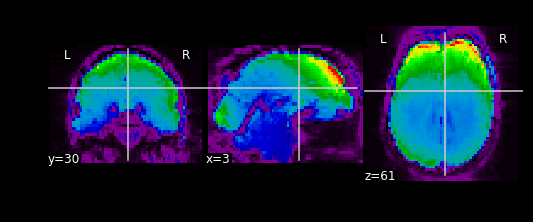

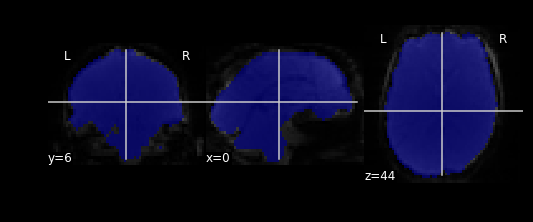

In [19]:
data_path = test_dir_path = os.path.join('data/')
masked_data = []

"""for i in range(1,4):
    fmrifile = os.path.join(data_path, '4DNIIFiles', '4D10'+str(i)+"-2.nii")
    fmri_data = nib.load(fmrifile)
    #print(fmri_data.shape)

    mask_img = compute_epi_mask(fmri_data)
    masked_data.append(apply_mask(fmri_data, mask_img))

    #mean_haxby = mean_img(fmri_data)
    plot_epi(mean_haxby)
    #plot_roi(mask_img, mean_haxby)"""

data_path = test_dir_path = os.path.join('data/')

fmrifile = os.path.join(data_path, '4DNIIFiles', '4D101-2.nii')
fmri_data = nib.load(fmrifile)
#print(fmri_data.shape)

mask_img = compute_epi_mask(fmri_data)
masked_data = apply_mask(fmri_data, mask_img)

mean_img = mean_img(fmri_data)
plot_epi(mean_img)
plot_roi(mask_img, mean_img)


[[218. 267. 252. ... 493. 280. 236.]
 [243. 265. 257. ... 491. 279. 227.]
 [200. 261. 261. ... 505. 281. 231.]
 ...
 [292. 302. 233. ... 525. 253. 210.]
 [308. 315. 226. ... 505. 260. 228.]
 [281. 280. 261. ... 498. 228. 180.]]
Rows: 650
Columns: 40964


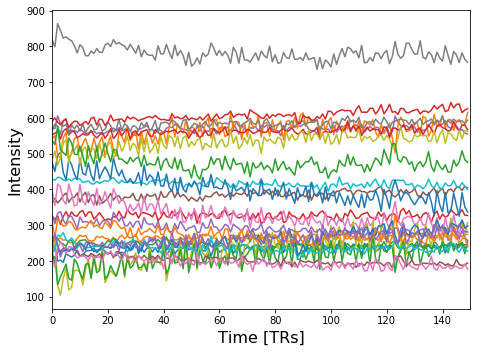

In [11]:
print masked_data
print ("Rows: " + str(len(masked_data)))
print ("Columns: " + str(len(masked_data[0])))


plt.figure(figsize=(7, 5))
plt.plot(masked_data[:150, :25])
plt.xlabel('Time [TRs]', fontsize=16)
plt.ylabel('Intensity', fontsize=16)
plt.xlim(0, 150)
plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)
plt.show()

In [14]:
mat = scipy.io.loadmat("./data/101/101-run1.mat")
data = mat["data"][0][0][2]
#print(data)

slices = []

count = 0
for i in data[:,3]:
    #print(int(i)-1)
    if(int(i)-1 == 0):
        slices.append(masked_data[0])
    else:
        slices.append(masked_data[int(i)-1])

In [15]:
slices, data = shuffle(slices, data, random_state=5)

train = slices[:15]
trainresults = data[:15,0]
test = slices[15:]
testresults = data[15:,0]

print trainresults
print testresults

[ 3.  0.  0.  0.  3. -3.  0.  0.  0.  2. -2.  0.  1.  0.  1.]
[ 3.  2.  0.  0. -1.  0.  0.  1.  0.  2.]


In [16]:
clf = RandomForestClassifier()
clf.fit(train, trainresults)
#print(clf.feature_importances_)
print("Predictions: ", clf.predict(test))
print("Results: ", testresults)

#print(len(fmrifiles))

('Predictions: ', array([ 0.,  1., -3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]))
('Results: ', array([ 3.,  2.,  0.,  0., -1.,  0.,  0.,  1.,  0.,  2.]))
